<a href="https://colab.research.google.com/github/molybdenum-jo/Recommend-Algorithm/blob/main/Dacon_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
base_path = "data"
train = pd.read_csv(f'{base_path}/train.csv')
test = pd.read_csv(f'{base_path}/test.csv')
submission = pd.read_csv(f'{base_path}/sample_submission.csv')
holidays_events = pd.read_csv(f'{base_path}/holidays_events.csv')
oil = pd.read_csv(f'{base_path}/oil.csv')
stores = pd.read_csv(f'{base_path}/stores.csv')
transactions = pd.read_csv(f'{base_path}/transactions.csv')

In [ ]:
label_name = "sales"
label_name

'sales'

In [ ]:
feature_names = ['id', 'date', 'store_nbr', 'family', 'onpromotion']

In [ ]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head(2)

(3000888, 5)


,id,date,store_nbr,family,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0
1,1,2013-01-01,1,BABY CARE,0


In [ ]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head(2)

(28512, 5)


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0


In [ ]:
y_train = np.log1p(train["sales"])
print(y_train.shape)
y_train.head(2)

(3000888,)


0    0.0
1    0.0
Name: sales, dtype: float64

In [ ]:
## arima 모델

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 날짜 열 변환
X_train['date'] = pd.to_datetime(X_train['date'])

# 카테고리형 열 변환
X_train['family'] = X_train['family'].astype('category')
X_train['family'] = X_train['family'].cat.codes

# ARIMA 모델 피팅
model_arima = ARIMA(X_train, order=(2, 1, 2))
model_arima_fit = model_arima.fit()

<ipython-input-26-e85b7d35b490>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['date'] = pd.to_datetime(X_train['date'])
<ipython-input-26-e85b7d35b490>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['family'] = X_train['family'].astype('category')
<ipython-input-26-e85b7d35b490>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

ValueError: ignored

In [ ]:
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                81886
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -644335.345
Date:                Tue, 16 May 2023   AIC                        1288680.690
Time:                        02:30:08   BIC                        1288727.255
Sample:                             0   HQIC                       1288694.949
                              - 81886                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9994      0.007   -149.779      0.000      -1.013      -0.986
ar.L2         -0.0793      0.007    -12.007      0.000      -0.092      -0.066
ma.L1          0.0106      0.001     12.176      0.0

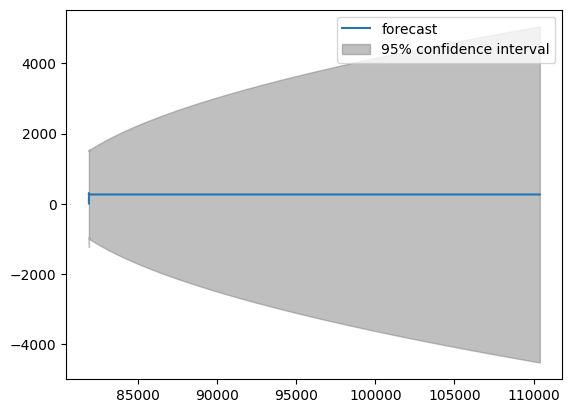

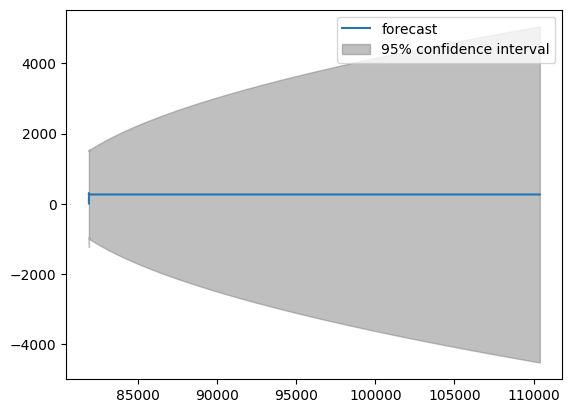

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
# 테스트 데이터에 대한 예측 수행
y_pred_arima = plot_predict(model_arima_fit, start=len(y), end=len(y)+len(X_test)-1, exog=X_test)

y_pred_arima

In [ ]:
fore = model_arima_fit.forecast(steps=1)
print(fore)

81886    9.572115
dtype: float64


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, fore)
r2

ValueError: ignored

In [ ]:
submit = pd.read_csv('data/sample_submission.csv')

In [ ]:
# 예측값을 submit 데이터프레임에 할당
submit["sales"] = pd.Series(abs(y_pred_arima))
submit.head()

,id,sales
0,3000888,NaN
1,3000889,NaN
2,3000890,NaN
3,3000891,NaN
4,3000892,NaN


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMAX 모델 학습
model_sarima = SARIMAX(y, exog=X, order=(2, 1, 2))
model_sarima

MissingDataError: ignored

In [ ]:
fit = model_sarima.fit()

# 모델 요약 정보 출력
print(fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                sales   No. Observations:                81886
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood             -644264.006
Date:                              Tue, 16 May 2023   AIC                        1288542.012
Time:                                      04:23:42   BIC                        1288607.203
Sample:                                           0   HQIC                       1288561.975
                                            - 81886                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9492      0.001  -1093.698      0.000      -0.951      -0.948
ar.L2         -0.01

In [ ]:
# 테스트 데이터에 대한 예측 수행
prediction = fit.get_prediction(start=len(y_train), end=len(y_train) + len(X_test) - 1)
y_pred_mean = prediction.predicted_mean


In [ ]:
print(y_pred_mean)

73697     254.122409
73698     120.868098
73699     273.629730
73700     -93.294055
73701     429.714397
             ...    
102204    200.158979
102205    188.438221
102206    187.235108
102207    197.238362
102208    189.201309
Name: predicted_mean, Length: 28512, dtype: float64
